In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_barcelona_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('barcelona')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/barcelona_{date}.csv',index=False)
get_listings_barcelona_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_barcelona = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_barcelona)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(barcelona_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 16055 AirBnb listings.


In [4]:
barcelona_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2020-12.csv')
barcelona_raw_df_12_12_2020.shape


(19641, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for barcelona
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_barcelona = glob.glob('barcelona/**.csv')
files_barcelona

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['barcelona/Barcelona_2020-12.csv',
 'barcelona/Barcelona_2021-08.csv',
 'barcelona/Barcelona_2021-09.csv',
 'barcelona/Barcelona_2021-01.csv',
 'barcelona/Barcelona_2021-02.csv',
 'barcelona/Barcelona_2021-03.csv',
 'barcelona/Barcelona_2021-07.csv',
 'barcelona/Barcelona_2021-06.csv',
 'barcelona/Barcelona_2021-04.csv',
 'barcelona/Barcelona_2021-10.csv',
 'barcelona/Barcelona_2021-05.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

barcelona_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(barcelona_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(barcelona_raw_df_12_12_2020['price'].mean(),2)}.")

barcelona_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(barcelona_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_1_9_2021['price'].mean(),2)}.")

barcelona_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(barcelona_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_2_8_2021['price'].mean(),2)}.")

barcelona_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(barcelona_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_3_4_2021['price'].mean(),2)}.")

barcelona_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(barcelona_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_4_9_2021['price'].mean(),2)}.")

#barcelona_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(barcelona_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_5_19_2021['price'].mean(),2)}.")

barcelona_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(barcelona_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_6_3_2021['price'].mean(),2)}.")

barcelona_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(barcelona_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_7_4_2021['price'].mean(),2)}.")

barcelona_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(barcelona_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_8_6_2021['price'].mean(),2)}.")

barcelona_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(barcelona_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_9_7_2021['price'].mean(),2)}.")

barcelona_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(barcelona_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_10_6_2021['price'].mean(),2)}.")

#barcelona_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(barcelona_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 19641 AirBnb listings; the avg price is €91.91.
The 1_9_2021 dataset contains 18569 AirBnb listings; the avg price is €103.39.
The 2_8_2021 dataset contains 18471 AirBnb listings; the avg price is €103.76.
The 3_4_2021 dataset contains 18286 AirBnb listings; the avg price is €106.15.
The 4_9_2021 dataset contains 18226 AirBnb listings; the avg price is €110.39.
The 6_3_2021 dataset contains 17589 AirBnb listings; the avg price is €111.72.
The 7_4_2021 dataset contains 17079 AirBnb listings; the avg price is €115.01.
The 8_6_2021 dataset contains 16554 AirBnb listings; the avg price is €115.96.
The 9_7_2021 dataset contains 16206 AirBnb listings; the avg price is €109.26.
The 10_6_2021 dataset contains 16055 AirBnb listings; the avg price is €112.47.


In [7]:
df_list_barcelona = [barcelona_raw_df_12_12_2020, barcelona_raw_df_1_9_2021, barcelona_raw_df_2_8_2021,
           barcelona_raw_df_3_4_2021, barcelona_raw_df_4_9_2021, barcelona_raw_df_6_3_2021, barcelona_raw_df_7_4_2021,
           barcelona_raw_df_8_6_2021, barcelona_raw_df_9_7_2021, barcelona_raw_df_10_6_2021]

dates_barcelona = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_barcelona = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_barcelona = []

def airbnb_parse_barcelona(df_list, files):
    for file in files_barcelona:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_{file}.csv")
        print(f"The {file} barcelona dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_barcelona(df_list, dates):
    for file in files_barcelona:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_barcelona.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_barcelona)

barcelona_parse = airbnb_parse_barcelona(df_list_barcelona, files_barcelona)


The 2020-12 barcelona dataset contains 19641 AirBnb listings -- the avg price is €91.91.
The 2021-01 barcelona dataset contains 18569 AirBnb listings -- the avg price is €103.39.
The 2021-02 barcelona dataset contains 18471 AirBnb listings -- the avg price is €103.76.
The 2021-03 barcelona dataset contains 18286 AirBnb listings -- the avg price is €106.15.
The 2021-04 barcelona dataset contains 18226 AirBnb listings -- the avg price is €110.39.
The 2021-06 barcelona dataset contains 17589 AirBnb listings -- the avg price is €111.72.
The 2021-07 barcelona dataset contains 17079 AirBnb listings -- the avg price is €115.01.
The 2021-08 barcelona dataset contains 16554 AirBnb listings -- the avg price is €115.96.
The 2021-09 barcelona dataset contains 16206 AirBnb listings -- the avg price is €109.26.
The 2021-10 barcelona dataset contains 16055 AirBnb listings -- the avg price is €112.47.


In [8]:
barcelona_summary = airbnb_to_frame_barcelona(df_list_barcelona, files_barcelona)
barcelona_summary['Date of scrape'] = pd.to_datetime(barcelona_summary['Date of scrape'])
barcelona_summary['City'] = 'Barcelona'

dfi.export(barcelona_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/airbnb_barcelona_summary.png")


In [9]:
master_df_barcelona = pd.concat(df_list_barcelona)
master_df_barcelona_unique = master_df_barcelona.drop_duplicates(subset='id')
master_df_barcelona_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37973,2.17631,Private room,80,3,2,2017-11-06,0.05,3,134,NaN,NaN
1,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,183,3,52,2019-12-15,0.44,2,320,NaN,NaN
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,98,2,63,2020-02-22,0.55,5,0,NaN,NaN
3,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37916,2.17535,Private room,46,30,8,2013-07-15,0.06,3,0,NaN,NaN
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,183,4,149,2020-03-11,1.20,3,67,NaN,NaN


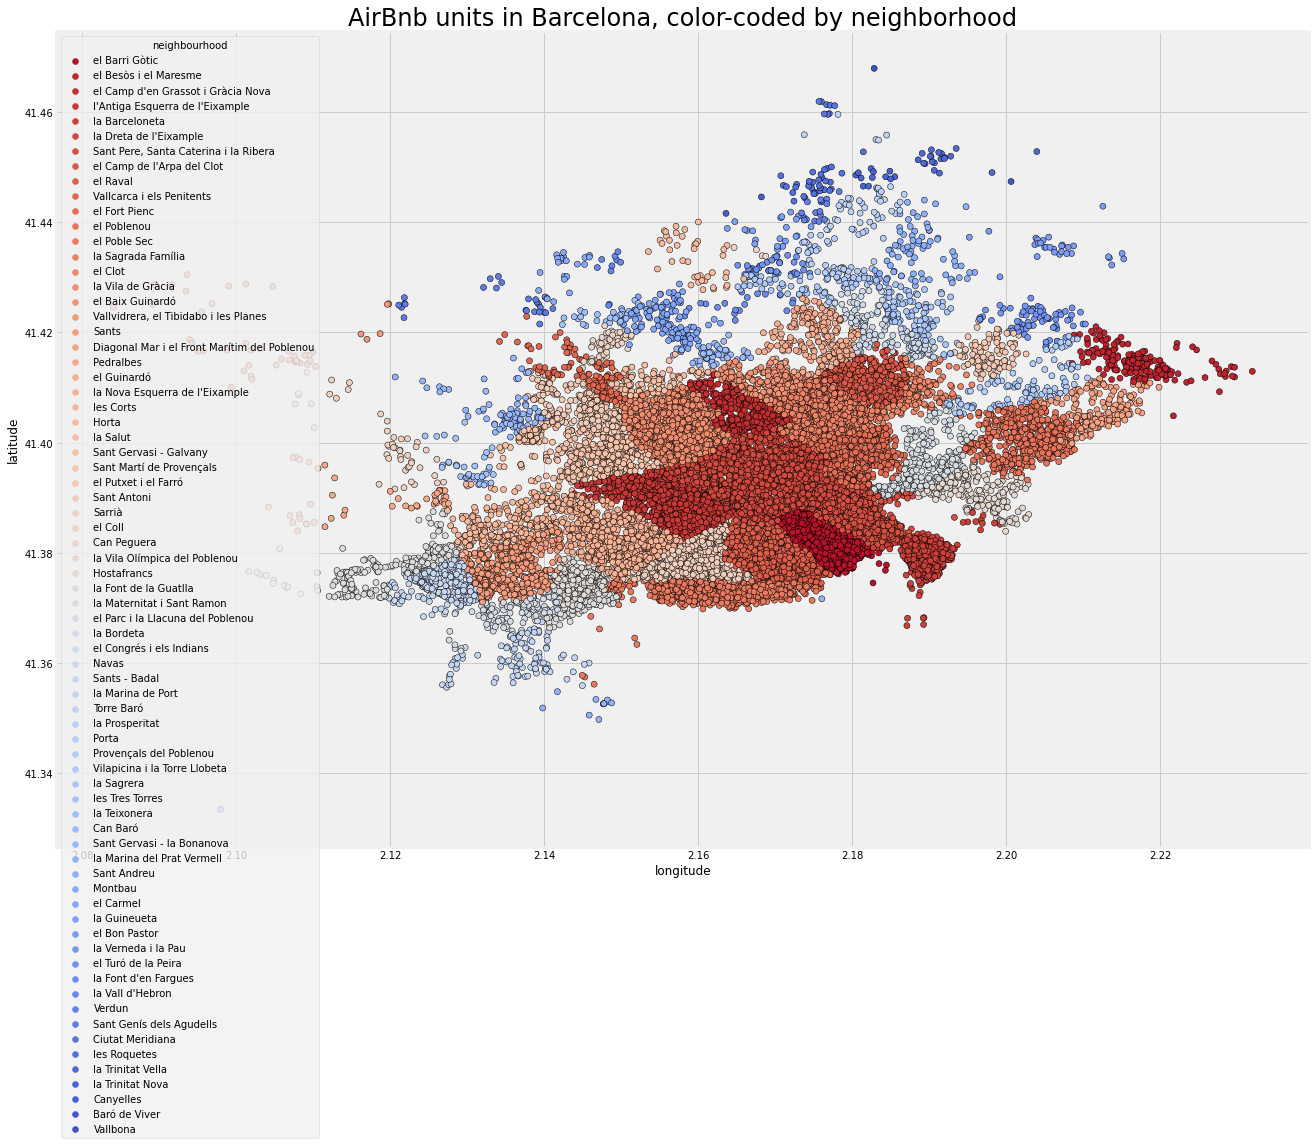

In [10]:
title = 'AirBnb units in Barcelona, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_barcelona_unique.longitude, master_df_barcelona_unique.latitude, hue = master_df_barcelona_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/airbnb_barcelona_map.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([barcelona_raw_df_10_6_2021,raw_df_barcelona],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2    5505
4    3129
1    2413
6    1620
3    1162
5    1078
0       2
Name: accommodates, dtype: int64

## Regression

In [12]:
#df_reviews_.columns

In [13]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [14]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -25.23240577474445
Coefficients:  [ 23.8986605  -11.4064082    3.32816279   0.37526792  -2.43574391
   3.79817277  12.4771369   -4.90303163   2.6618717 ]
LinearRegression()


In [15]:
y_pred2 = regr.predict(X_)

In [16]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


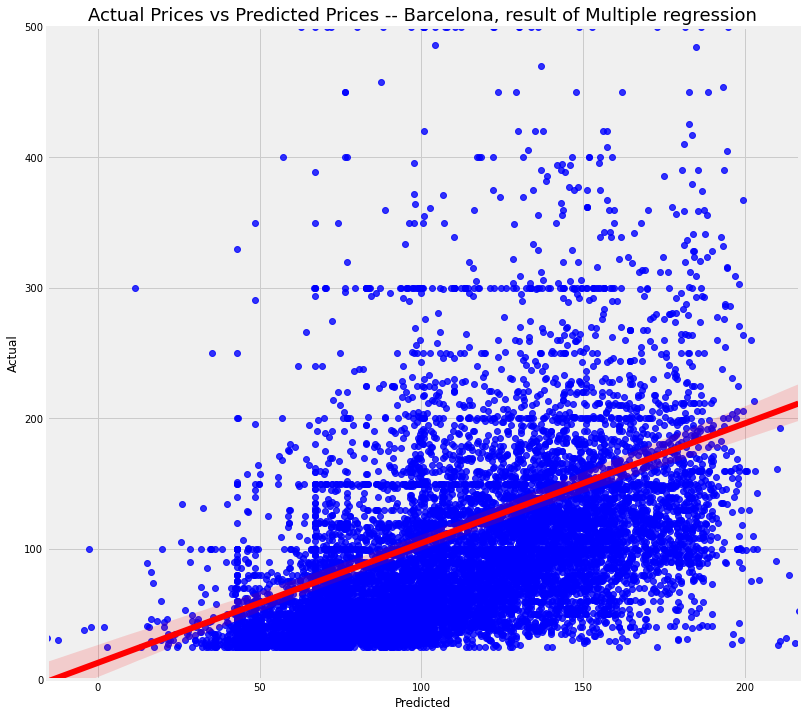

In [17]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Barcelona, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/airbnb_barcelona_multiple_regression.png')



In [18]:
df_result.shape

(12806, 3)

## The most mispriced [undervalued]

In [29]:
barcelona_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
barcelona_mispriced['%'] = (barcelona_mispriced['Actual']/ barcelona_mispriced['Predicted'] -1) *100
barcelona_mispriced_perc = barcelona_mispriced.sort_values(by=['%'], ascending=True)
barcelona_mispriced_perc_plot = barcelona_mispriced_perc.loc[(barcelona_mispriced_perc['Predicted']>=1) & (barcelona_mispriced_perc['Diff']>= 1)]
barcelona_mispriced_perc_plot = barcelona_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
barcelona_mispriced_perc_plot.head(10)
                                                             
                                                   

,Actual,Predicted,Diff,%
10989,26,210.387452,184.387452,-87.641849
4013,28,215.568254,187.568254,-87.011074
13563,29,210.817949,181.817949,-86.244056
13542,27,195.998246,168.998246,-86.224367
14773,25,172.724946,147.724946,-85.526121
9498,32,212.639060,180.639060,-84.951025
13643,30,198.951141,168.951141,-84.920921
2239,25,161.071500,136.071500,-84.478943
11297,30,179.240215,149.240215,-83.262685
3304,31,182.002006,151.002006,-82.967221


In [20]:

barcelona_mispriced_1 = raw_df_barcelona.loc[raw_df_barcelona.id==5386]
barcelona_mispriced_2 = raw_df_barcelona.loc[raw_df_barcelona.id==1353]
barcelona_mispriced_3 = raw_df_barcelona.loc[raw_df_barcelona.index==4126]
barcelona_mispriced_4 = raw_df_barcelona.loc[raw_df_barcelona.index==258]
barcelona_mispriced_5 = raw_df_barcelona.loc[raw_df_barcelona.index==4227]

In [21]:
id_array = [10989, 4013, 13563, 13542, 14773]

barcelona_mispriced_query = raw_df_barcelona.query('index in @id_array')
barcelona_mispriced_query = barcelona_mispriced_query.rename({'index': 'id'}, axis=1)
barcelona_mispriced_query.shape
#barcelona_mispriced_query.head(1)

(5, 74)

In [30]:
#barcelona_mispriced_neg = raw_df_barcelona.loc[raw_df_barcelona.index==4119]
barcelona_mispriced_perc_1 = raw_df_barcelona.loc[raw_df_barcelona.id==9498]
barcelona_mispriced_perc_2 = raw_df_barcelona.loc[raw_df_barcelona.id==4013]
barcelona_mispriced_perc_3 = raw_df_barcelona.loc[raw_df_barcelona.id==13563]
barcelona_mispriced_perc_4 = raw_df_barcelona.loc[raw_df_barcelona.id==13643]
barcelona_mispriced_perc_5 = raw_df_barcelona.loc[raw_df_barcelona.id==14773]

In [33]:
barcelona_mispriced = barcelona_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
barcelona_mispriced_1 = barcelona_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

barcelona_mispriced_1[:1]
barcelona_mispriced_1[:2]
barcelona_mispriced_1[:3]
barcelona_mispriced_1[:4]
barcelona_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
4013,15045744,$28.00,4.79,4.79,4.79,4.95,4.79,4.89,NaN,https://www.airbnb.com/rooms/15045744
10989,39747206,$26.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/39747206
13542,45889448,$27.00,NaN,NaN,NaN,NaN,NaN,NaN,"Barcelona, Catalunya, Spain",https://www.airbnb.com/rooms/45889448
13563,45947679,$29.00,4.50,4.50,4.50,5.00,5.00,5.00,"Barcelona, Catalunya, Spain",https://www.airbnb.com/rooms/45947679
14773,50264247,$25.00,5.00,5.00,5.00,5.00,5.00,5.00,"Barcelona, Catalunya, Spain",https://www.airbnb.com/rooms/50264247


In [34]:
dfi.export(barcelona_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/airbnb_barcelona_mispriced.png")



## The best score

In [35]:
barcelona_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
barcelona_high_value.head()

,Actual,Predicted,Diff
8676,52,216.611928,164.611928
4013,28,215.568254,187.568254
10899,80,213.532534,133.532534
9498,32,212.639060,180.639060
13563,29,210.817949,181.817949


In [36]:
id_array = [8676, 4013, 10899, 9498, 13563]

barcelona_best_score_query = raw_df_barcelona.query('index in @id_array')
barcelona_best_score_query = barcelona_best_score_query.rename({'index': 'id'}, axis=1)
#barcelona_best_score_query.head(1)

In [37]:
barcelona_best_score = barcelona_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
barcelona_best_score_1 = barcelona_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

barcelona_best_score_1[:1]
barcelona_best_score_1[:2]
barcelona_best_score_1[:3]
barcelona_best_score_1[:4]
barcelona_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
4013,15045744,$28.00,4.79,4.79,4.79,4.95,4.79,4.89,NaN,https://www.airbnb.com/rooms/15045744
8676,32301094,$52.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,https://www.airbnb.com/rooms/32301094
9498,35107053,$32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/35107053
10899,39569737,$80.00,5.00,5.00,5.00,5.00,5.00,4.83,NaN,https://www.airbnb.com/rooms/39569737
13563,45947679,$29.00,4.50,4.50,4.50,5.00,5.00,5.00,"Barcelona, Catalunya, Spain",https://www.airbnb.com/rooms/45947679


In [38]:
dfi.export(barcelona_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/airbnb_barcelona_best_score.png")


